# 1) Install the package

In [45]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("agronomymap", quietly = TRUE)) {
 remotes::install_github("agronomy4future/agronomymap", force= TRUE)
}
library(remotes)
library(agronomymap)

#2) Data example

In [46]:
if(!require(remotes)) install.packages("readr")
library (readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/SOC.csv"
df=data.frame(read_csv(url(github),show_col_types= FALSE))
colnames(df)[3]=c("Yield")
print(head(df,5))

  Column Row Yield
1      1   1  1.45
2      2   1  1.60
3      3   1  2.34
4      4   1  2.20
5      5   1  1.80


# 3) Create yield map using geom_tile()

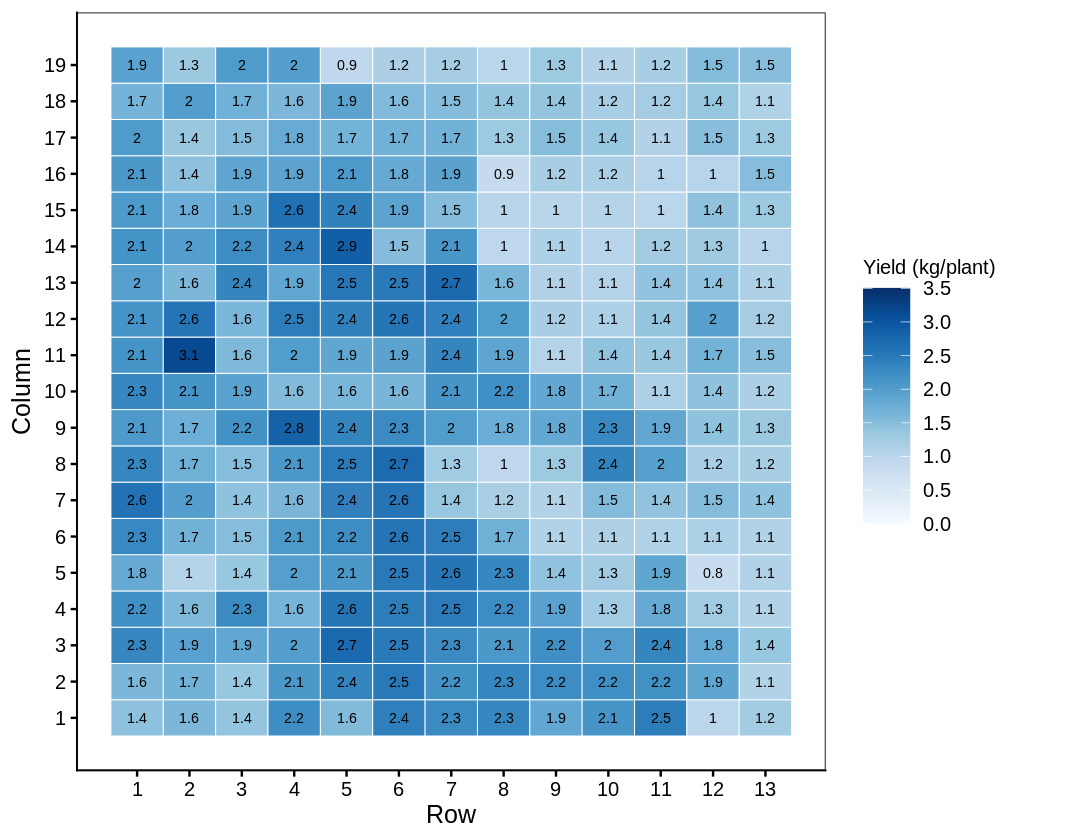

In [47]:
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(RColorBrewer)) install.packages("RColorBrewer")
library (ggplot2)
library(RColorBrewer)

Fig1= ggplot(df, aes(x=Row, y=Column, fill=Yield)) +
  geom_tile(color="white") +
  geom_text(aes(label=round(Yield, 1)), color="black", size=3) +
  scale_x_continuous(breaks=1:13) +
  scale_y_continuous(breaks=1:19) +
  scale_fill_gradientn(
  colours=colorRampPalette(brewer.pal(9, "Blues"))(100),
  limits=c(0, 3.5),  breaks=seq(0, 3.5, 0.5), name="Yield (kg/plant)", na.value="white") +
  labs(x="Row", y="Column") +
  theme_classic(base_size=15) +
  theme(legend.position="right",
        legend.title= element_text(size=12),
        legend.key.size=unit(1,'cm'),
        legend.key=element_rect(color=alpha("white",.05), fill=alpha("white",.05)),
        legend.text=element_text(size=12),
        legend.background=element_rect(fill=alpha("white",.05)),
        panel.grid=element_blank(),
        panel.border=element_rect(color="black", fill=NA, linewidth=0.5),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=9, repr.plot.height=7)
print(Fig1)

ggsave("Fig1.png", plot= Fig1, width=9, height= 7, dpi= 300)

#4) Create yield map using agronomymap()

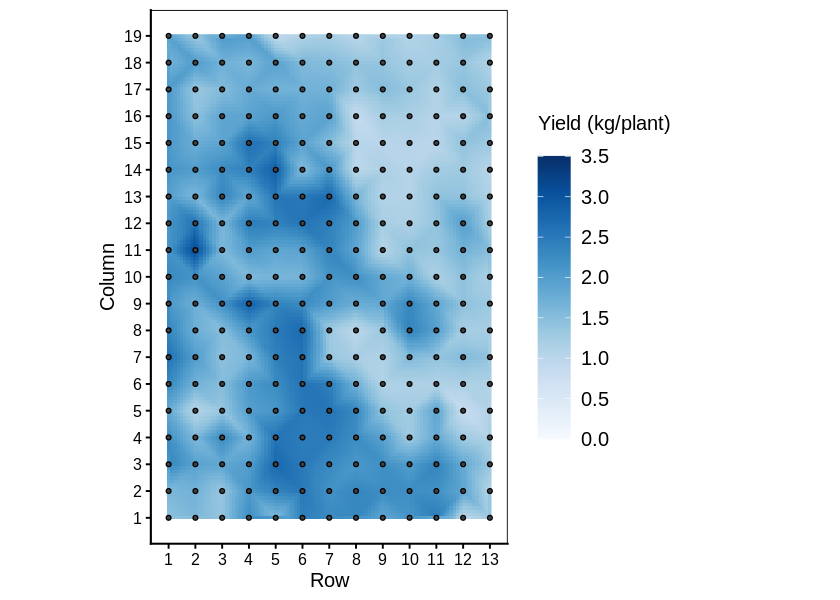

In [48]:
Fig2= agronomymap(
 data= df,
 map= c("Row", "Column"),
 variable= "Yield",
 # fill scale
 grid_res = 100,
 palette= "Blues",
 fill_limits= c(0, 3.5),
 fill_breaks= seq(0, 3.5, 0.5),
 # label
 label_title= "Yield (kg/plant)",
 label_size= 12,
 label_key= 12,
 label_position= "right",
 label_key_height= 1.2,
 label_key_width= 0.7,
 xlab= "Row",
 ylab= "Column",
 # point aesthetics
 point_size= 1,
 point_shape= 21,
 point_color= "black",
 point_fill= "grey25",
 #border and axis unit
 add_border= TRUE,
 axis_units= TRUE
)

options(repr.plot.width=7, repr.plot.height=5)
print(Fig2)

ggsave("Fig2.png", plot= Fig2, width=7, height= 5, dpi= 300)